<a href="https://colab.research.google.com/github/mdlyons/flights/blob/main/Plotly_Instructional_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Plotly

We are using the 2015 Flight Delays dataset (downloaded from DS 861's iLearn site) for this instructional. The original data can be found on [Kaggle](https://www.kaggle.com/usdot/flight-delays).

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Plotly libraries
import plotly.express as px # create Plotly visualizations
import plotly.offline as py # save interactive plots in html
import plotly.io as pio
pio.templates.default = 'plotly_white'

## Plotly Installation

If this notebook runs without errors, then you already have the Plotly library. Otherwise, to install Plotly for use in Jupyter Notebook, open your terminal window/command line and type:

conda install -c plotly plotly=5.3.1

OR

pip install plotly==5.3.1

## Data Preparation

In [2]:
# Read the flight data into pandas dataframe 
url = 'https://raw.githubusercontent.com/mdlyons/flights/main/flights.csv' # from github
df = pd.read_csv(url)

#df = pd.read_csv('flights.csv') # from your computer

df.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,EV,4160,N11150,JAX,EWR,540,531,-9,9,540,137,132,109,820,729,14,757,743,-14,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,1635,N025AA,ATL,DFW,625,NaN,NaN,NaN,NaN,150,NaN,NaN,731,NaN,NaN,755,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,119,N271LV,RSW,ATL,800,754,-6,11,805,105,100,84,515,929,5,945,934,-11,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Clean the dataset
df.drop(df.tail(19).index, inplace = True) # delete the last 19 rows that are not part of the dataset
df.dropna(subset = ['WEATHER_DELAY'], inplace = True) # remove most of the missing data
df = df.apply(pd.to_numeric, errors = 'ignore') # change columns data types to numeric, where applicable

In [4]:
# add new columns for string values of day of the week, month and airlines
days = {1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat',7:'Sun'}
df['DAY_OF_WEEK_NUM'] = df['DAY_OF_WEEK']
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK_NUM'].apply(lambda x: days[x])

months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['MONTH_NUM'] = df['MONTH']
df['MONTH'] = df['MONTH_NUM'].apply(lambda x: months[x])

airlines = {'DL':'Delta','VX':'Virgin','AA':'American Air','OO':'Skywest','NK':'Spirit','AS':'Alaska Air',
            'WN':'Southwest','MQ':'American Eagle','B6':'JetBlue','US':'US Air','UA':'United','F9':'Frontier',
           'EV':'Atlantic','HA':'Hawaii Air'}
df['AIRLINE_CODE'] = df['AIRLINE']
df['AIRLINE'] = df['AIRLINE_CODE'].apply(lambda x: airlines[x])

df.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_OF_WEEK_NUM,MONTH_NUM,AIRLINE_CODE
7,2015,Jan,1,Thur,Skywest,5354,N472CA,ORD,MBS,1317,1349,32,27,1416,66,70,39,222,1555,4,1523,1559,36,0,0,NaN,4,0,11,21,0,4,1,OO
9,2015,Jan,1,Thur,United,1062,N73291,DCA,DEN,1603,1603,0,12,1615,249,272,248,1476,1823,12,1812,1835,23,0,0,NaN,23,0,0,0,0,4,1,UA
19,2015,Jan,2,Fri,US Air,2065,N534UW,CLT,IAH,1120,1128,8,11,1139,163,176,154,912,1313,11,1303,1324,21,0,0,NaN,13,0,8,0,0,5,1,US


## Feature 1: Bar Chart

In [5]:
# data for average arrival delay by airline
arr_delay_avg = df.groupby(by=['AIRLINE'])['ARRIVAL_DELAY'].mean().sort_values(ascending=False
                                                                                           ).reset_index()

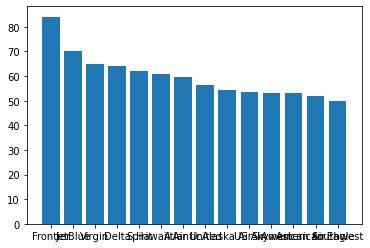

In [6]:
# basic bar chart
plt.bar(x = arr_delay_avg['AIRLINE'], height = arr_delay_avg['ARRIVAL_DELAY'])
plt.show()

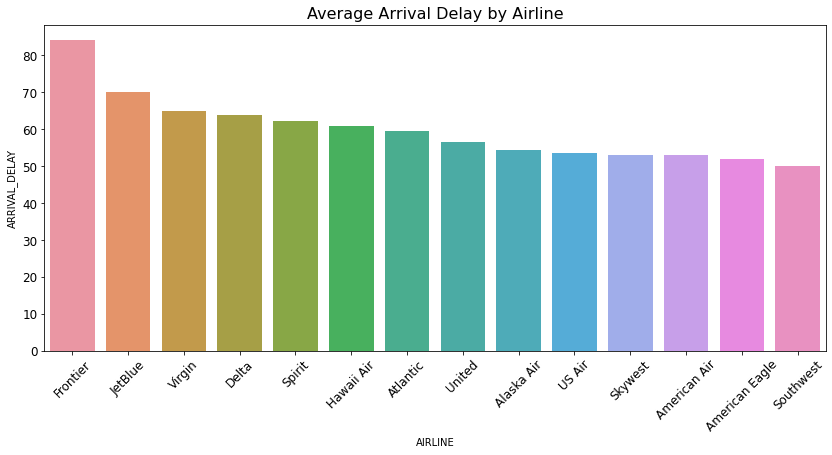

In [7]:
# bar chart with additional formatting using Seaborn
plt.figure(figsize=(14,6))
sns.barplot(x='AIRLINE', y='ARRIVAL_DELAY', data=arr_delay_avg)
plt.title('Average Arrival Delay by Airline', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [8]:
# simple bar chart in Plotly. google colab adds 'AIRLINE=' in front of the variables in the legend but jupyter notebook does not.
px.bar(arr_delay_avg, x='AIRLINE', y='ARRIVAL_DELAY', color='AIRLINE', title='Average Arrival Delay by Airline')

## Feature 2: Boxplot

In [9]:
# data of top 5 airlines with the highest average arrival delay
top5_list = df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values(ascending=False).reset_index()[:5]
top5_list = df[df['AIRLINE'].isin(top5_list['AIRLINE'])].copy()
top5_list.sort_values(['AIRLINE', 'DAY_OF_WEEK_NUM'], inplace=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



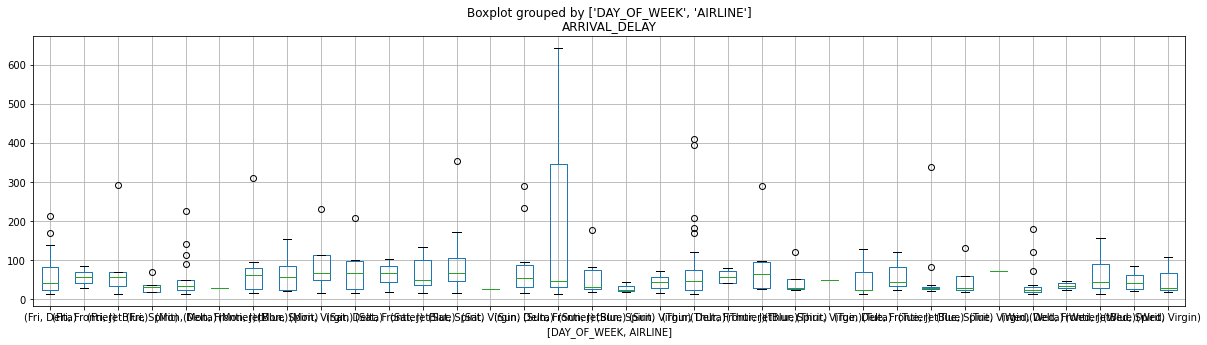

In [10]:
# basic boxplot
top5_list.boxplot(column = 'ARRIVAL_DELAY', by = ['DAY_OF_WEEK','AIRLINE'], figsize= (20,5))
plt.show()

In [11]:
# simple boxplot in Plotly
px.box(top5_list, x='DAY_OF_WEEK', y='ARRIVAL_DELAY', color='AIRLINE', 
       title='Arrival Delay (in minutes) by Day of the Week')

## Feature 3: Scatterplot

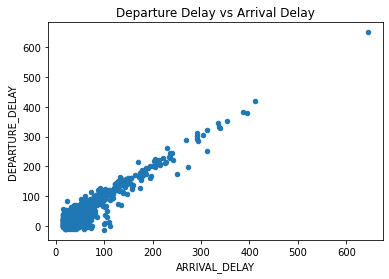

In [12]:
# basic scatterplot of arrival delay vs departure delay
df.plot(kind = 'scatter', x = 'ARRIVAL_DELAY', y = 'DEPARTURE_DELAY', 
        title='Departure Delay vs Arrival Delay')
plt.show()

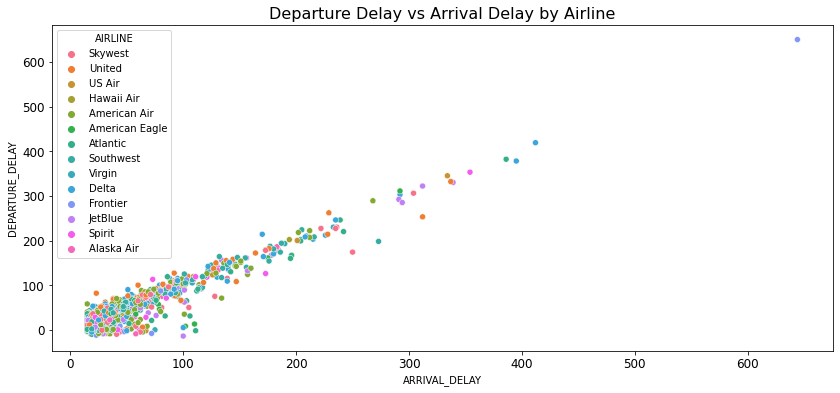

In [13]:
# scatterplot with additional formatting using Seaborn
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='ARRIVAL_DELAY', y='DEPARTURE_DELAY', hue='AIRLINE')
plt.title('Departure Delay vs Arrival Delay by Airline', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [14]:
# simple scatterplot in Plotly
px.scatter(df, x='ARRIVAL_DELAY', y='DEPARTURE_DELAY', color='AIRLINE', size='ARRIVAL_DELAY',
           title='Departure Delay vs Arrival Delay by Airline')

## Feature 4: Line Chart

In [15]:
# data of average arrival delay by month by airline
airline_month_group = df.groupby(['AIRLINE','MONTH_NUM'])['ARRIVAL_DELAY'].mean().sort_values(ascending=False
                                                                                         ).reset_index()
#airline_month_group = df[df['AIRLINE'].isin(airline_month_group['AIRLINE'])].copy()
airline_month_group.sort_values(['AIRLINE', 'MONTH_NUM'], inplace=True)

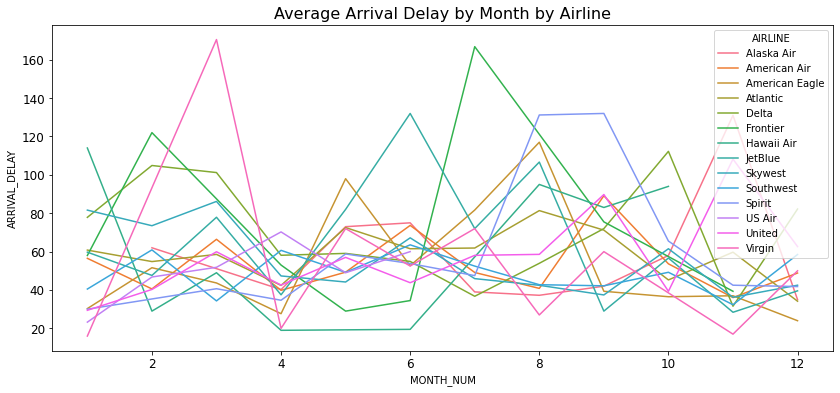

In [16]:
# line chart with formatting using Seaborn
plt.figure(figsize=(14,6))
sns.lineplot(data=airline_month_group, x='MONTH_NUM', y='ARRIVAL_DELAY', hue='AIRLINE')
plt.title('Average Arrival Delay by Month by Airline', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [17]:
# simple line chart in Plotly
px.line(airline_month_group, x='MONTH_NUM', y='ARRIVAL_DELAY', color='AIRLINE', 
        title='Average Arrival Delay by Month by Airline')

In [18]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly_white'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [19]:
# try out different templates
px.line(airline_month_group, x='MONTH_NUM', y='ARRIVAL_DELAY', color='AIRLINE', 
        title='Average Arrival Delay by Month by Airline',
        labels={'ARRIVAL_DELAY': 'AVERAGE ARRIVAL DELAY', 'MONTH_NUM': 'MONTH'}, # change the axis labels
        template='ygridoff+plotly_dark') # try these template options: seaborn, plotly_dark, presentation, ygridoff, plotly

## Feature 5: Histogram

In [20]:
# data for arrival delay by airport
df['arr_delay_cat'] = pd.qcut(df.ARRIVAL_DELAY,q=5,labels=['very low','low','med','high','very high'])
df.sort_values(['ARRIVAL_DELAY','DAY_OF_WEEK'], inplace=True)

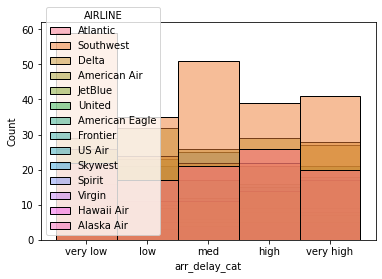

In [21]:
# basic histogram using Seaborn
sns.histplot(data=df, x='arr_delay_cat', hue='AIRLINE')
plt.show()

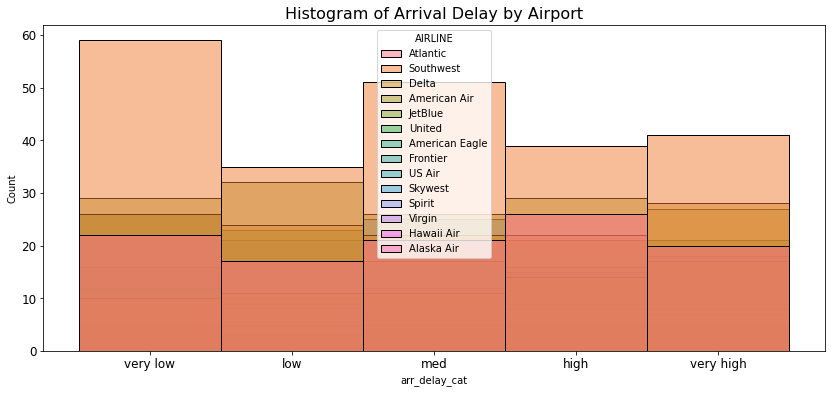

In [22]:
# histogram with additional formatting using Seaborn
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='arr_delay_cat', hue='AIRLINE')
plt.title('Histogram of Arrival Delay by Airport', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [23]:
# simple histogram in Plotly
fig=px.histogram(df, x='arr_delay_cat', y='ARRIVAL_DELAY', color='AIRLINE', 
                 title='Histogram: Sum of Arrival Delay by Airport',
                 labels=dict(arr_delay_cat='Arrival Delay'), histfunc='sum'
                 ).update_layout(yaxis_title='Sum of Arrival Delay (in minutes)', bargap=0)
fig.show()

In [24]:
# simple animation in Plotly
df.sort_values(['ARRIVAL_DELAY','DAY_OF_WEEK_NUM','AIRLINE',], inplace=True)
fig=px.histogram(df, x='arr_delay_cat', y='ARRIVAL_DELAY', color='AIRLINE', 
                 title='Animation: Sum of Arrival Delay [Day of Week, Airport]',
                 labels=dict(arr_delay_cat='Arrival Delay'), histfunc='sum',
                 animation_frame='DAY_OF_WEEK',
                 ).update_layout(yaxis_title='Sum of Arrival Delay (in minutes)', bargap=0)
fig.show()

In [25]:
# keep this one? rework so it makes more sense.
# add a line, arrow and text to the animation showing Saturday's lowest Arrival Delay levels
fig.add_shape( # add a horizontal "target" line
    type="line", line_width=1, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=3500, y1=3500, yref="y"
)
fig.add_annotation( # add a text callout with arrow
    text="Saturday", x=1, y=3600, arrowhead=1, showarrow=True
).update_layout(title='Animation: Sum of Arrival Delay [Day of Week, Airport]', bargap=0)
fig.show()

## Bonus Feature: Sunburst Chart

In [26]:
# upgrade plotly for google colab if there is an error for sunburt chart. only need to run once a day? delete before turning in.
!pip install plotly==4.8.2

In [27]:
# sunburst chart. works fine in jupyter notebook. sometimes in google colab.
df.sort_values(['MONTH_NUM'], inplace=True)
px.sunburst(df, path=['MONTH','AIRLINE'], values='ARRIVAL_DELAY', 
            width=750, height=750,
            color='ARRIVAL_DELAY',
            title='Sunburst Chart: Arrival Delay [Month, Airline]')

## Save plots

In [28]:
# save plot to html and open in a new window. google colab saves but does not open in a new window.
fig.update_layout(title='Example: Plot Exported to HTML')
py.offline.plot(fig, filename='plotly_example.html')

'plotly_example.html'

In [29]:
# alternate way that saves but doesn't automatically open in a new window
fig.write_html('plotly_example_alt.html')

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Plotly Tutorials](https://plotly.com/python/) | Examples of how to make interactive, publication-quality graphs. 
[Reference list for Plotly](https://plotly.com/python-api-reference/index.html) | Full list of visualization plots in Plotly Express.
[Intro to Plotly Animations](https://plotly.com/python/animations/) | An introduction to creating animations with Plotly in Python. 